In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/automobile-dataset/Automobile.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
df = pd.read_csv('/kaggle/input/automobile-dataset/Automobile.csv')
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [5]:
df.columns

Index(['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/automobile-dataset/Automobile.csv')

# Check for missing values
df.isnull().sum()

# Drop rows with missing values
df.dropna(inplace=True)

# Convert 'horsepower' to numeric (if it's object type)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Drop rows again in case any conversion failed
df.dropna(inplace=True)

# Map 'origin' column values to integers
df['origin'] = df['origin'].map({'usa': 1, 'europe': 2, 'japan': 3})

# Convert all columns to proper types
df = df.astype({
    'mpg': 'float',
    'cylinders': 'int',
    'displacement': 'float',
    'horsepower': 'float',
    'weight': 'float',
    'acceleration': 'float',
    'model_year': 'int',
    'origin': 'int'
})

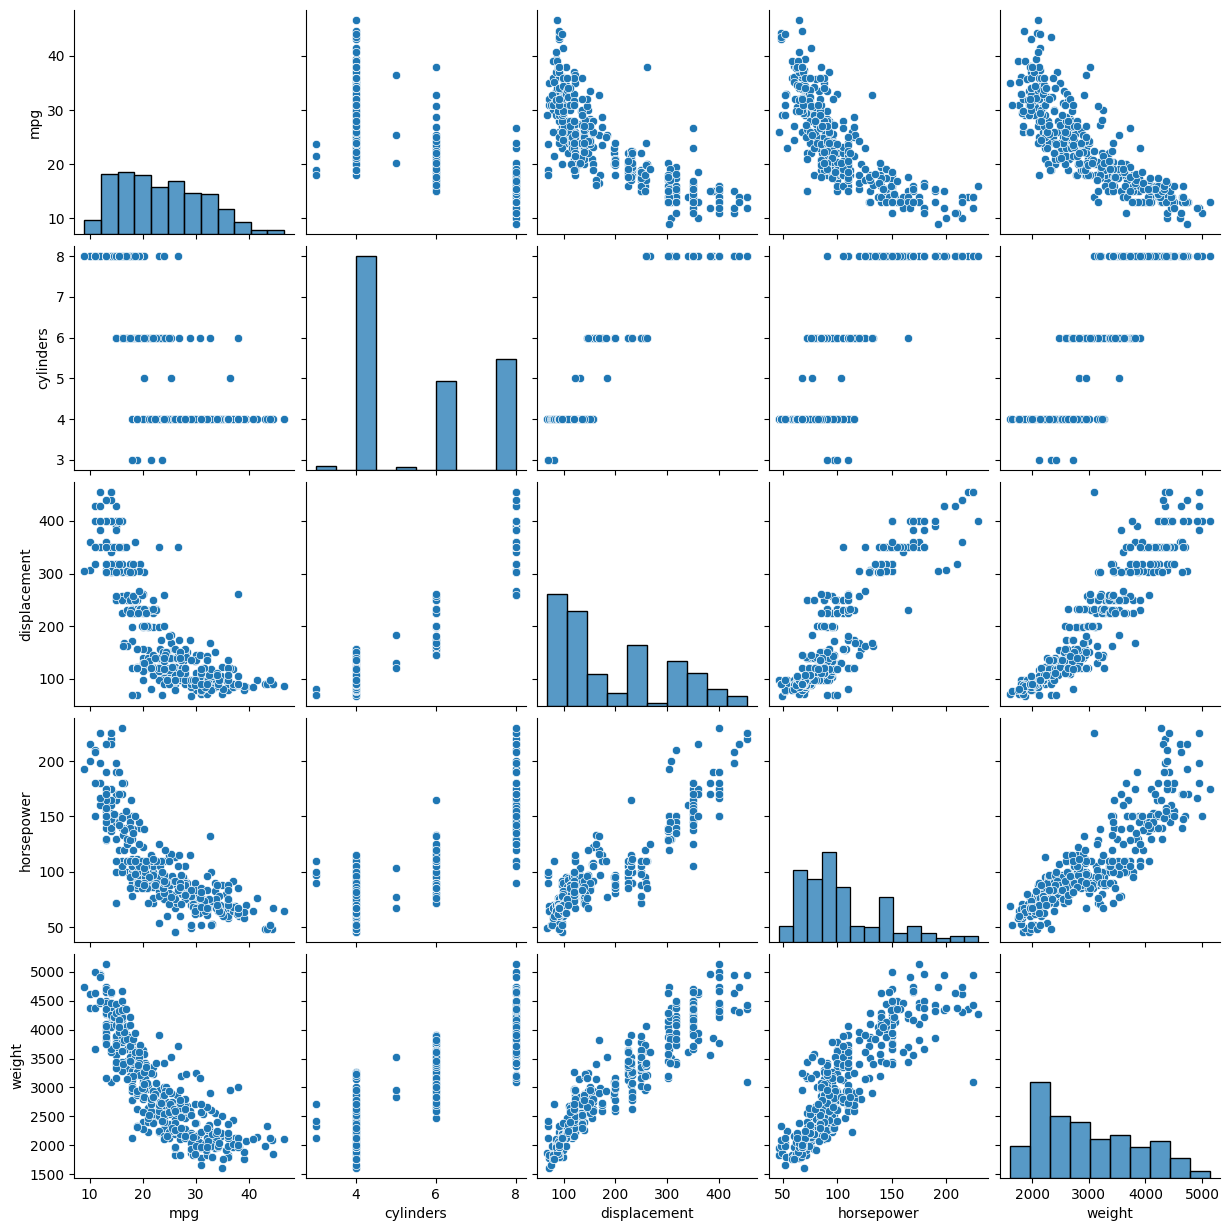

In [7]:
# Pairplot to show relationships
sns.pairplot(df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']])
plt.show()

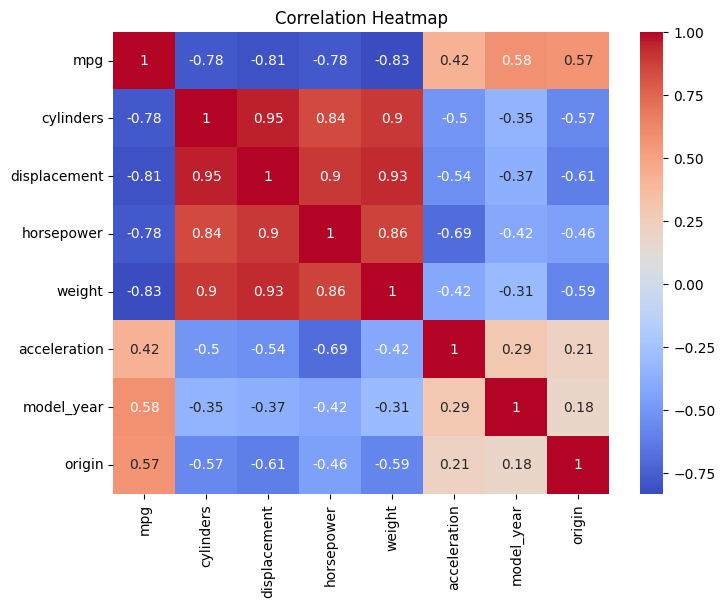

In [8]:
# Correlation heatmap
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
# Define features and target
X = df.drop(columns=['mpg', 'name'])
y = df['mpg']

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train Random Forest (best for tabular regression)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.888712085258602
MSE: 5.680200075949368
